<a href="https://colab.research.google.com/github/SAKAMOTO968/Train_elephant_YoloV8.ipynb/blob/main/WgangTrain_elephant_YoloV8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
HOME = os.getcwd() # กำหนดตัวแปร HOME ให้เก็บที่อยู่ของโฟลเดอร์ปัจจุบัน
print(HOME) # พิมพ์ที่อยู่ของโฟลเดอร์ปัจจุบันออกมา

/content


In [2]:
!pip install ultralytics # ติดตั้งไลบรารี Ultralytics ซึ่งเป็นแพลตฟอร์มสำหรับโมเดล YOLO
!pip install roboflow # ติดตั้งไลบรารี Roboflow เพื่อดาวน์โหลดชุดข้อมูล

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 98.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [3]:
!mkdir -q {HOME}/datasets # สร้างโฟลเดอร์ชื่อ 'datasets' ในโฟลเดอร์ปัจจุบัน (ถ้ายังไม่มี)
%cd {HOME}/datasets # เปลี่ยนไดเรกทอรีการทำงานไปที่โฟลเดอร์ 'datasets'

mkdir: invalid option -- 'q'
Try 'mkdir --help' for more information.
[Errno 2] No such file or directory: '/content/datasets # เปลี่ยนไดเรกทอรีการทำงานไปที่โฟลเดอร์ datasets'
/content


In [ ]:
from roboflow import Roboflow # นำเข้าคลาส Roboflow
rf = Roboflow(api_key="jDVTvJHMWuHarRig6gsX") # สร้าง Object ของ Roboflow ด้วย API Key
project = rf.workspace("sakamoto96").project("test_elephant_detection-8vhgg") # ระบุ workspace และ project ของชุดข้อมูล
version = project.version(1) # เลือกเวอร์ชันที่ 1 ของโปรเจกต์
dataset = version.download("yolov8") # ดาวน์โหลดชุดข้อมูลในรูปแบบ YOLOv8

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to test_elephant_detection-1 in yolov8:: 100%|██████████| 726/726 [00:00<00:00, 3429.10it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
import ultralytics
from ultralytics import YOLO

%cd {HOME} # เปลี่ยนไดเรกทอรีการทำงานกลับไปที่ HOME (ซึ่งกำหนดไว้ก่อนหน้านี้)

# สั่งรันคำสั่ง YOLO ด้วยพารามิเตอร์ เทรนด้วยโมเดล YOLO เวอร์ชั่น yolov8s เทรน 10 epochs ขนาดรูปภาพไซส์ 640
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True

/content
Ultralytics 8.3.193 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/test_elephant_detection-1/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, 

In [4]:
import matplotlib.pyplot as plt # นำเข้าไลบรารีสำหรับสร้างกราฟและแสดงภาพ
import cv2 # นำเข้าไลบรารี OpenCV สำหรับการจัดการภาพ
import os # นำเข้าไลบรารีสำหรับจัดการระบบไฟล์

def display_image(image_path, figsize=(10, 10)): # สร้างฟังก์ชันสำหรับแสดงภาพ
  if not os.path.exists(image_path): # ตรวจสอบว่าไฟล์ภาพมีอยู่จริงหรือไม่
    print(f"Image not found at path: {image_path}") # ถ้าไม่มี ให้พิมพ์ข้อความแจ้งเตือน
    return # จบการทำงานของฟังก์ชัน

  image = cv2.imread(image_path) # อ่านภาพจาก path ที่กำหนด
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # แปลงสีภาพจาก BGR (ค่าเริ่มต้นของ OpenCV) เป็น RGB
  plt.figure(figsize=figsize) # สร้าง figure สำหรับแสดงภาพ กำหนดขนาด
  plt.imshow(image) # แสดงภาพ
  plt.axis('off') # ซ่อนแกน (axis) ของกราฟ
  plt.show() # แสดงผลลัพธ์

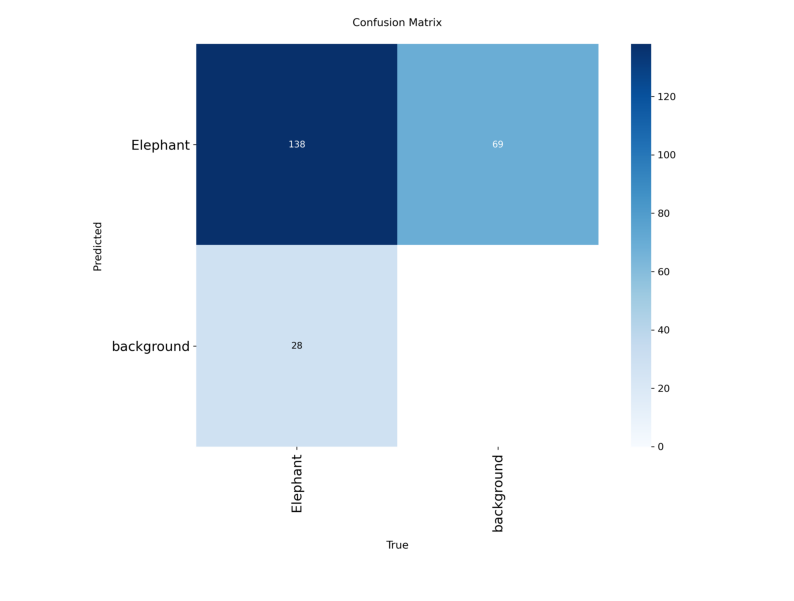

In [ ]:
# เส้นทางไฟล์ภาพ confusion_matrix
image_path = f"{HOME}/runs/detect/train/confusion_matrix.png"
# เรียกใช้ฟังก์ชันแสดงภาพ
display_image(image_path)

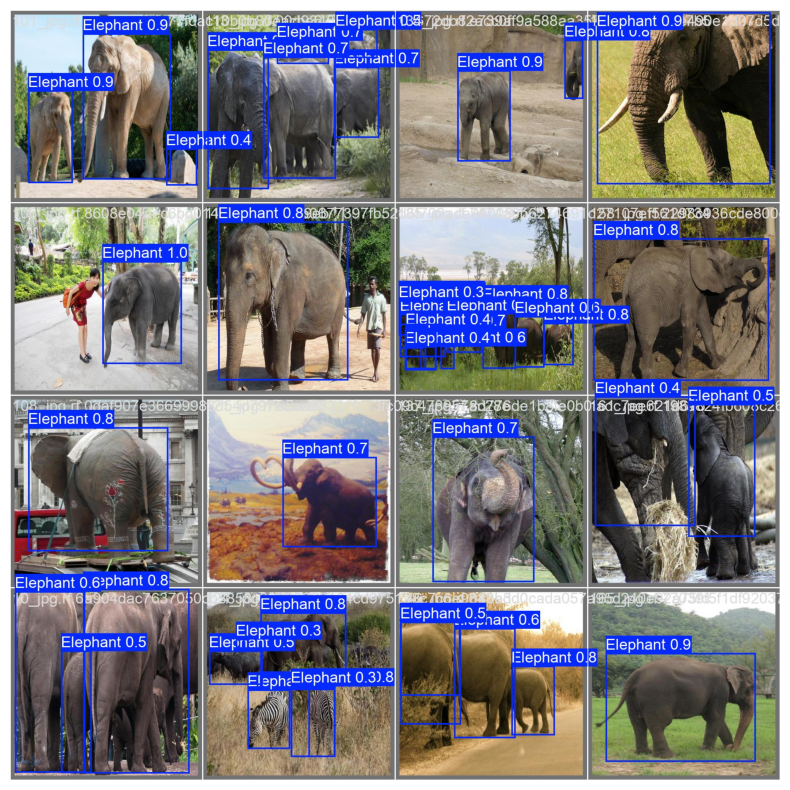

In [ ]:
image_path = f'{HOME}/runs/detect/train/val_batch0_pred.jpg' # กำหนด path ไปยังไฟล์ 'val_batch0_pred.jpg'
display_image(image_path) # แสดงภาพตัวอย่างการทำนายบนข้อมูล validation

In [ ]:
from google.colab import files # นำเข้าไลบรารีสำหรับจัดการไฟล์ใน Google Colab
files_path = '/content/runs/detect/train/weights/best.pt' # กำหนด path ไปยังโมเดลที่ฝึกเสร็จแล้ว
files.download(files_path) # ดาวน์โหลดไฟล์โมเดล 'best.pt' ไปยังเครื่องคอมพิวเตอร์

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
from google.colab import files
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [29]:
uploaded = files.upload() # แสดงปุ่มให้ผู้ใช้เลือกอัปโหลดไฟล์
if not uploaded:
  raise FileNotFoundError("No file uploaded") # ถ้าไม่มีไฟล์ถูกอัปโหลด ให้แสดงข้อผิดพลาด
test_image_path = next(iter(uploaded.keys())) # นำชื่อไฟล์ที่อัปโหลดมาใช้

Saving 2.jpg to 2 (1).jpg


In [30]:
model_path = "best.pt" # กำหนดชื่อไฟล์โมเดลที่ดาวน์โหลดมา
if not os.path.exists(model_path): # ตรวจสอบว่าไฟล์โมเดลมีอยู่จริงหรือไม่
  raise FileNotFoundError(f"Model not found at path: {model_path}") # ถ้าไม่มี ให้แสดงข้อผิดพลาด
model = YOLO(model_path) # โหลดโมเดล YOLOv8 จากไฟล์ที่กำหนด

In [34]:
image = cv2.imread(test_image_path) # อ่านภาพที่อัปโหลดเข้ามา
if image is None:
  raise FileNotFoundError(f"Image not found at path: {test_image_path}") # ถ้าอ่านไม่ได้ ให้แสดงข้อผิดพลาด
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # แปลงภาพจาก BGR เป็น RGB
results = model(image) # ใช้โมเดลทำนายผลลัพธ์บนภาพ


0: 640x608 1 Elephant, 545.3ms
Speed: 3.4ms preprocess, 545.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


In [32]:
for result in results: # วนลูปดูผลลัพธ์แต่ละภาพ (ในที่นี้มีภาพเดียว)
  boxes = result.boxes.cpu().numpy() # ดึงข้อมูล bounding box ออกมา
  for box in boxes: # วนลูปดู bounding box แต่ละอัน
    x1, y1, x2, y2 = box.xyxy[0] # แยกพิกัดของกล่อง (x1, y1 เป็นมุมบนซ้าย, x2, y2 เป็นมุมล่างขวา)
    confidence = box.conf[0] # ดึงค่าความมั่นใจ (confidence) ของการทำนาย
    cls = int(box.cls[0]) # ดึงคลาสของวัตถุ
    if confidence > 0.5: # ตรวจสอบว่าค่าความมั่นใจมากกว่า 0.5 หรือไม่
      label = f"{model.names[cls]} {confidence:.2f}" # สร้างข้อความ label สำหรับแสดงผล
      cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 255), 2) # วาดสี่เหลี่ยมรอบวัตถุ
      cv2.putText(image, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2) # วาด label พร้อมค่าความมั่นใจ

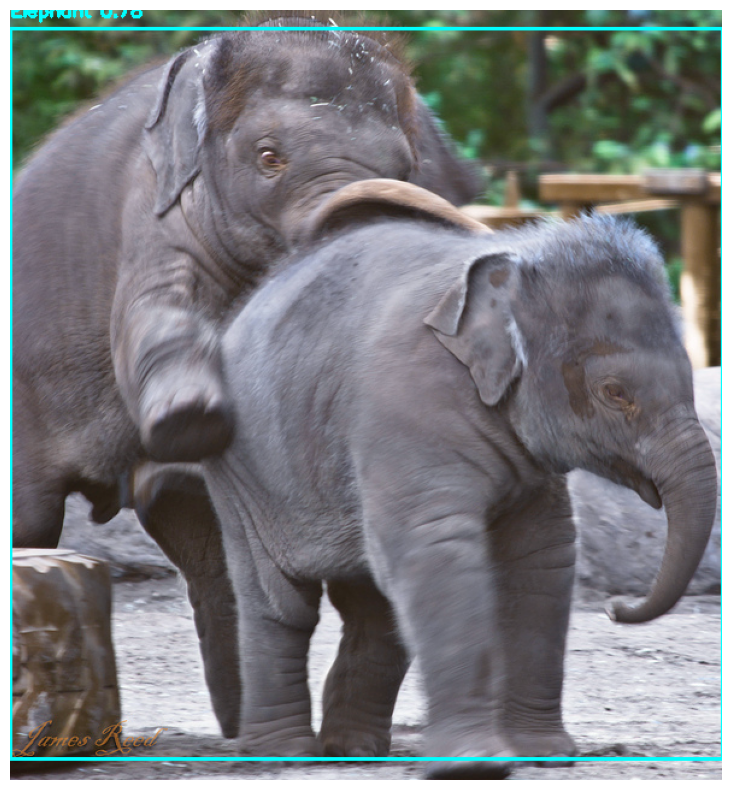

In [33]:
plt.figure(figsize=(10, 10)) # สร้าง figure สำหรับแสดงภาพ กำหนดขนาด
plt.imshow(image) # แสดงภาพที่มีการวาด bounding box และ label
plt.axis('off') # ซ่อนแกน
plt.show() # แสดงผลลัพธ์สุดท้าย